In [153]:
import numpy as np
import pandas as pd
import csv as csv

#Import Training Set
train = pd.read_csv('csv/train.csv', header=0)
print(train.columns)
print(train.info())
train.head(5)

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [154]:
# Clean Training Set

# From above there was a number of null age's - which could be an important feature
train['Age_fill'] = train['Age']
mean_age = np.zeros(3)

for i in range(3):
    mean_age[i] = train[(train['Pclass'] == i+1)]['Age'].dropna().mean()
    train.loc[(train['Age_fill'].isnull()) & (train['Pclass'] == i+1)] = mean_age[i]
    
def child(person):
    age,sex = person
    return 'child' if age < 16 else sex
train['Sex2'] = train[['Age_fill', 'Sex']].apply(child, axis=1)
train['Gender'] = train['Sex2'].map({'male':0, 'female':1, 'child':2})

In [155]:
train['Family'] = train['SibSp'] + train['Parch']
train['Port'] = train['Embarked'].map({'S':0, 'C':1, 'Q':2}).dropna().astype(int)
train_filtered = train[['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age_fill', 'Family', 'Fare', 'Port']]
train_filtered.head(5)

,PassengerId,Survived,Pclass,Name,Gender,Age_fill,Family,Fare,Port
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",0.0,22.0,1.0,7.2500,0.0
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,38.0,1.0,71.2833,1.0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",1.0,26.0,0.0,7.9250,0.0
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,35.0,1.0,53.1000,0.0
4,5.0,0.0,3.0,"Allen, Mr. William Henry",0.0,35.0,0.0,8.0500,0.0


In [156]:
train_filtered = train_filtered[(train_filtered['Survived'] == 0) | (train_filtered['Survived'] == 1)]
train_filtered['Port'] = train_filtered['Port'].fillna(value=0.0)
train_filtered['Port'].unique()

array([ 0.,  1.,  2.])

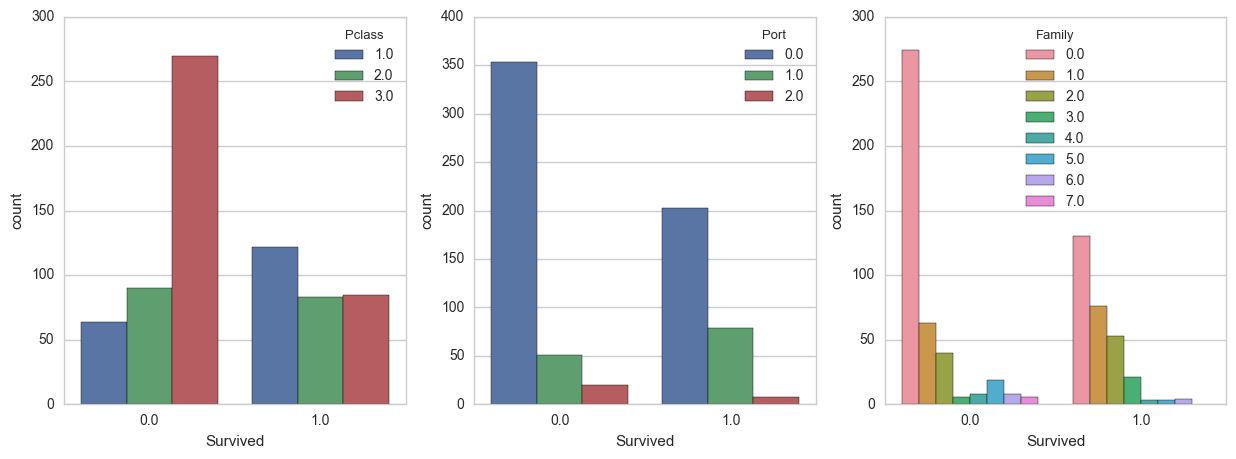

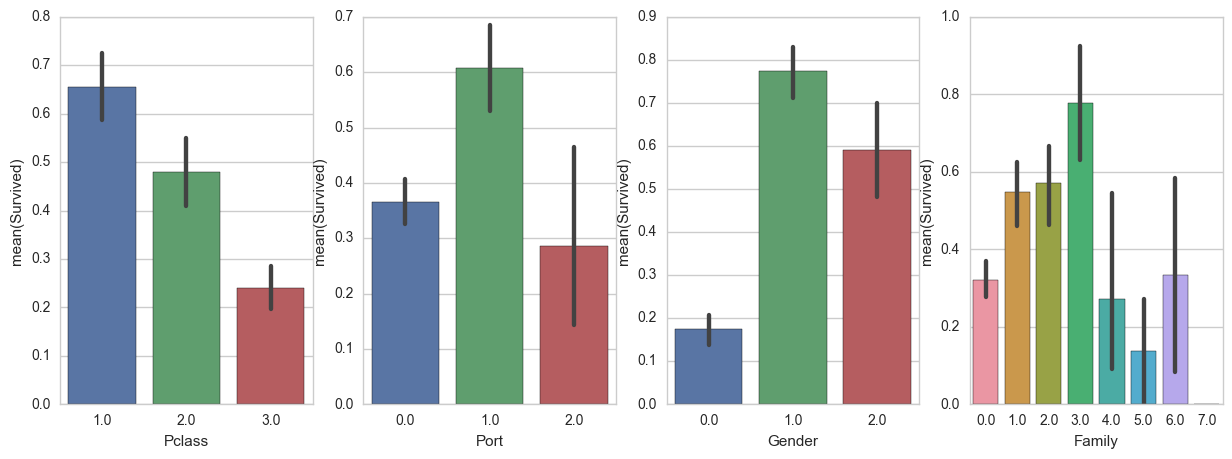

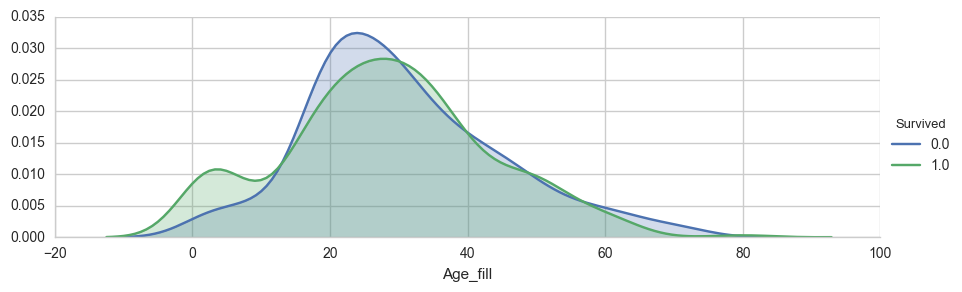

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
%matplotlib inline
#Three Count Plots
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x = "Survived", hue="Pclass", data = train_filtered, ax = axis1)
sns.countplot(x = "Survived", hue="Port", data = train_filtered, ax = axis2)
sns.countplot(x = "Survived", hue="Family", data=train_filtered, ax=axis3)
#Four Mean Survival Plots
fig, (axis11,axis22,axis33, axis44) = plt.subplots(1,4,figsize=(15,5))
sns.barplot(x="Pclass", y="Survived", data=train_filtered, ax=axis11)
sns.barplot(x="Port", y="Survived", data=train_filtered, ax=axis22)
sns.barplot(x = "Gender", y = 'Survived', data = train_filtered, ax = axis33)
sns.barplot(x="Family", y="Survived", data=train_filtered, ax=axis44)
#KDE Plot to show survival with Age
facet = sns.FacetGrid(train_filtered, hue="Survived", aspect=3)
facet.map(sns.kdeplot,'Age_fill',shade= True)
facet.add_legend()


In [158]:
train_filtered.describe()

,PassengerId,Survived,Pclass,Gender,Age_fill,Family,Fare,Port
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,0.537815,29.699118,0.943978,34.694514,0.260504
std,259.119524,0.491460,0.838250,0.694073,14.526497,1.483788,52.918930,0.521012
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,0.000000,20.125000,0.000000,8.050000,0.000000
50%,445.000000,0.000000,2.000000,0.000000,28.000000,0.000000,15.741700,0.000000
75%,677.750000,1.000000,3.000000,1.000000,38.000000,1.000000,33.375000,0.000000
max,891.000000,1.000000,3.000000,2.000000,80.000000,7.000000,512.329200,2.000000


In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold

alg = LogisticRegression()
kf = KFold(train_filtered.shape[0], n_folds=100, random_state=1)
predictors = ['Pclass', 'Port', 'Gender', 'Family', 'Fare', 'Age_fill']

predictions = []
for tra, test in kf:
    train_predictors = (train_filtered[predictors].iloc[tra,:])
    train_target = train_filtered["Survived"].iloc[tra]
    # Training the algorithm
    alg.fit(train_predictors, train_target)
    # Make Predictions
    test_predictions = alg.predict(train_filtered[predictors].iloc[test,:])
    predictions.append(test_predictions)

In [160]:
import numpy as np

predictions = np.concatenate(predictions, axis=0)

# Map predictions to outcomes
predictions[predictions > .5] = 1
predictions[predictions <=.5] = 0
accuracy = sum(predictions[predictions == train_filtered["Survived"]]) / len(predictions)
accuracy

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


0.79691876750700286

In [163]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=4, min_samples_leaf=2)
kf = cross_validation.KFold(train_filtered.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(alg, train_filtered[predictors], train_filtered["Survived"], cv=kf)
scores.mean()

0.80532212885154075

In [165]:
import re

# A function to get the title from a name.
def get_title(name):
    # Use a regular expression
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# Get all the titles and print how often each one occurs.
titles = train_filtered["Name"].apply(get_title)
print(pd.value_counts(titles))

# Map each title to an integer.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v

# Verify that we converted everything.
print(pd.value_counts(titles))

# Add in the title column.
train_filtered["Title"] = titles

train_filtered.head(5)

Mr          398
Miss        146
Mrs         108
Master       36
Dr            6
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Name, dtype: int64
1     398
2     147
3     108
4      36
6       6
5       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


,PassengerId,Survived,Pclass,Name,Gender,Age_fill,Family,Fare,Port,Title
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",0.0,22.0,1.0,7.2500,0.0,1
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,38.0,1.0,71.2833,1.0,3
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",1.0,26.0,0.0,7.9250,0.0,2
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,35.0,1.0,53.1000,0.0,3
4,5.0,0.0,3.0,"Allen, Mr. William Henry",0.0,35.0,0.0,8.0500,0.0,1


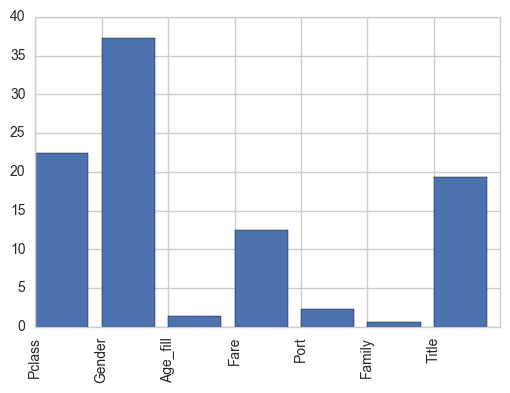

In [166]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

predictors = ["Pclass", "Gender", "Age_fill", "Fare", "Port", "Family", "Title"]

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(train_filtered[predictors], train_filtered["Survived"])

# Get the raw p-values for each feature
scores = -np.log10(selector.pvalues_)

# Plot the scores.
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [168]:
alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=8, min_samples_leaf=4)
# Compute the accuracy score for all the cross validation folds.
scores = cross_validation.cross_val_score(alg, train_filtered[predictors], train_filtered["Survived"], cv=3)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.816577323866


In [170]:
from sklearn.ensemble import GradientBoostingClassifier

#Algorithms to ensemble
algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), ["Pclass", "Gender", "Age_fill", "Fare", "Port", "Family", "Title"]],
    [LogisticRegression(random_state=1), ["Pclass", "Gender", "Age_fill", "Fare", "Port", "Family", "Title"]]
]

# Initialize the cross validation folds
kf = KFold(train_filtered.shape[0], n_folds=3, random_state=1)

predictions = []
for train, test in kf:
    train_target = train_filtered["Survived"].iloc[train]
    full_test_predictions = []
    # Make predictions
    for alg, predictors in algorithms:
        # Fit the algorithm on the training data.
        alg.fit(train_filtered[predictors].iloc[train,:], train_target)
        # Select and predict on the test fold.  
        # The .astype(float) is necessary to convert the dataframe to all floats and avoid an sklearn error.
        test_predictions = alg.predict_proba(train_filtered[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    # Use a simple ensembling scheme -- just average the predictions to get the final classification.
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    # Any value over .5 is assumed to be a 1 prediction, and below .5 is a 0 prediction.
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)

# Put all the predictions together into one array.
predictions = np.concatenate(predictions, axis=0)

# Compute accuracy by comparing to the training data.
accuracy = sum(predictions[predictions == train_filtered["Survived"]]) / len(predictions)
print(accuracy)


0.812324929972


D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:35: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
